<a href="https://colab.research.google.com/github/rvi077344/Denoising-using-Autoencoder/blob/master/DENOISING22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0.beta0

In [0]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import models, layers, optimizers

2.0.0-beta0


In [0]:
NCLASSES = 10
HEIGHT = 28
WIDTH = 28
NUM_CHANNELS = 1
BATCH_SIZE = 128

In [0]:
input_img = layers.Input(shape=(HEIGHT, WIDTH, NUM_CHANNELS))

In [0]:
#ENCODER
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu, padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu, padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu, padding='same')(x)
encoder = layers.MaxPooling2D((2,2), padding='same')(x)

In [0]:
#DECODER
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu, padding='same')(encoder)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation=tf.nn.relu, padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu )(x) 
x = layers.UpSampling2D((2,2))(x)
decoder = layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid',padding='same')(x)

In [0]:
#autoencoder
autoencoder = models.Model(input_img, decoder)
autoencoder.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])                    

In [0]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
mnist = tf.keras.datasets.mnist
(x_train, _ ),(x_test, _ ) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_train = x_train/255.0
x_test=x_test.reshape(10000,28,28,1)
x_test = x_test/255.0
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
history=autoencoder.fit(x_train,x_train,epochs=10, batch_size = BATCH_SIZE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.2114 - accuracy: 0.7990
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1328 - accuracy: 0.8056
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1216 - accuracy: 0.8080
Epoch 4/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1161 - accuracy: 0.8092
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1123 - accuracy: 0.8099
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1092 - accuracy: 0.8105
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1067 - accuracy: 0.8109
Epoch 8/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1047 - accuracy: 0.8113
Epoch 9/10
60000/60000 [===

In [0]:
import matplotlib.pyplot as plt

In [0]:
decoded_imgs = autoencoder.predict(x_test[:1])

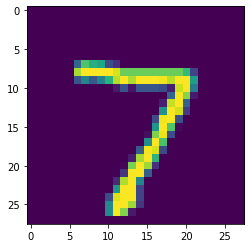

In [0]:
plt.imshow(x_test[0].reshape(28,28))

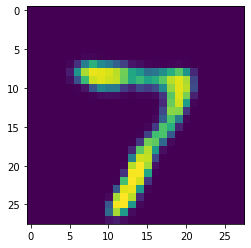

In [0]:
plt.imshow(decoded_imgs[0].reshape(28,28))

In [0]:
#add noise
factor = 0.5
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

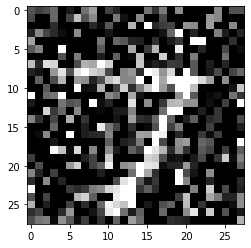

In [0]:
plt.imshow(x_test_noisy[0].reshape(28,28))
plt.gray()

In [0]:
history_1=autoencoder.fit(x_train_noisy,x_train,epochs=10, batch_size = BATCH_SIZE)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1242 - accuracy: 0.8095
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1236 - accuracy: 0.8096
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1231 - accuracy: 0.8097
Epoch 4/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1226 - accuracy: 0.8098
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1222 - accuracy: 0.8098
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1218 - accuracy: 0.8099
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1214 - accuracy: 0.8100
Epoch 8/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1210 - accuracy: 0.8100
Epoch 9/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1208 - accuracy: 0.8101
Epoch 10/10
60

In [0]:
cleaned_imgs=autoencoder.predict(x_test_noisy[:1])

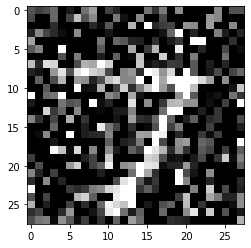

In [0]:
plt.imshow(x_test_noisy[0].reshape(28,28))

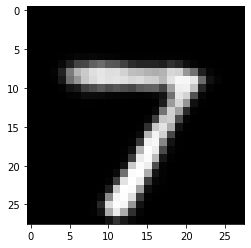

In [0]:
plt.imshow(cleaned_imgs[0].reshape(28,28))